In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import urllib
import requests
import re

def replaceString(inputFile,outputFile,):          
    # Read in the file
    with open(inputFile, 'r') as file :
      filedata = file.read()

    # Replace two or more spaces for one
    filedata = re.sub(" +", " ", filedata);

    # Write the file out again
    with open(outputFile, 'w') as file:
      file.write(filedata)

                  
urls = ['http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data',
        'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.name']

def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)
    replaceString('data/yeast.data','data/yeast.data')
    


In [2]:
load_dataset('data', urls)
columns = ['id','mcg','gah','alm','mit','erl','pox','vac','nun' ,'name']
df = pd.read_csv('data/yeast.data', names=columns, sep=' ', na_values='?')
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df)

              id   mcg   gah   alm   mit  erl   pox   vac   nun name
0     ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.00  0.48  0.22  MIT
1     ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.00  0.53  0.22  MIT
2     ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.00  0.53  0.22  MIT
3     AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.00  0.54  0.22  NUC
4     AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.00  0.48  0.22  MIT
5     AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.50  0.49  0.22  CYT
6     ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.00  0.53  0.22  MIT
7     BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.00  0.58  0.34  NUC
8     ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.00  0.49  0.22  MIT
9     ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.00  0.58  0.30  CYT
10    ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.00  0.53  0.27  NUC
11    ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.00  0.52  0.29  NUC
12    ACH1_YEAST  0.40  0.42  0.57  0.35  0.5  0.00  0.53  0.25  CYT
13    ACON_YEAST  0.60  0.40  0.52

In [3]:
####  Print dataframe
df.head()

,id,mcg,gah,alm,mit,erl,pox,vac,nun,name
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [4]:
##### Prints dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
id      1484 non-null object
mcg     1484 non-null float64
gah     1484 non-null float64
alm     1484 non-null float64
mit     1484 non-null float64
erl     1484 non-null float64
pox     1484 non-null float64
vac     1484 non-null float64
nun     1484 non-null float64
name    1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


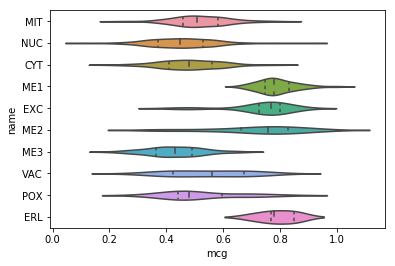

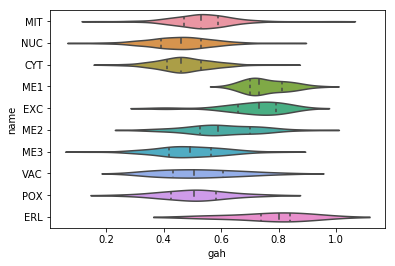

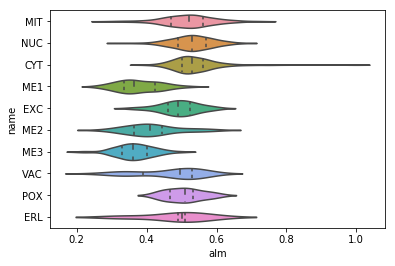

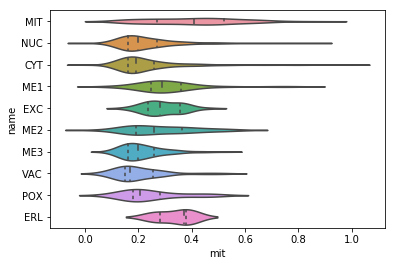

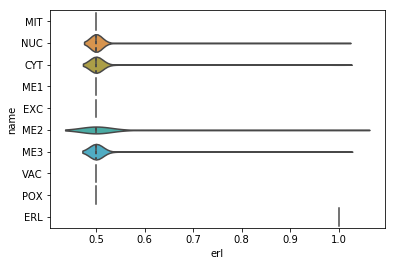

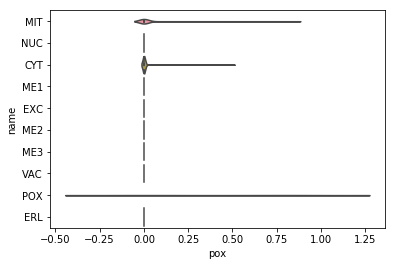

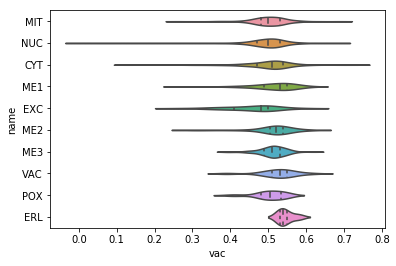

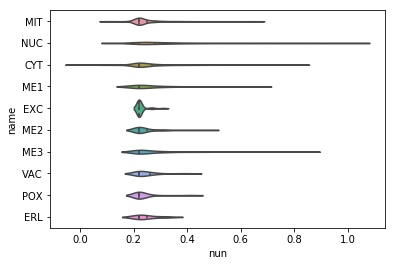

In [5]:
g = sns.violinplot(y='name', x='mcg', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='gah', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='alm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='mit', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='erl', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='pox', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='vac', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='name', x='nun', data=df, inner='quartile')
plt.show()

In [6]:
##### Encondes the dataframe in order to replace strings with floats 
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
#To restrict the number of classes with less than 50 occurancies uncomment the line bellow
#df = df.groupby("name").filter(lambda x: len(x) > 50)
print(df.name.value_counts())
df['name'] = encode.fit_transform(df['name'].astype(str))

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64


In [7]:
########## Modeling with scikit-learn ####
X = df.drop(['name','id'], axis=1)
y = df['name']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

    mcg   gah   alm   mit  erl  pox   vac   nun
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
(1484, 8)
0    6
1    6
2    6
3    7
4    6
Name: name, dtype: int32
(1484,)


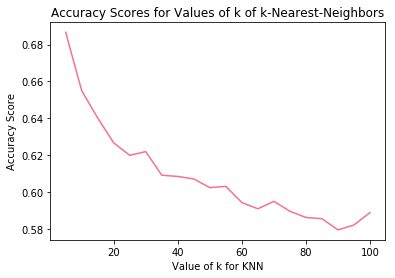

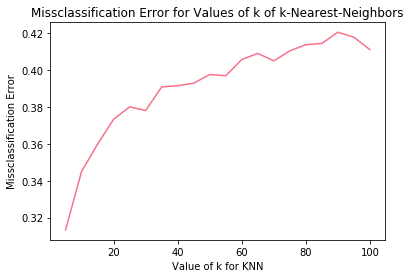

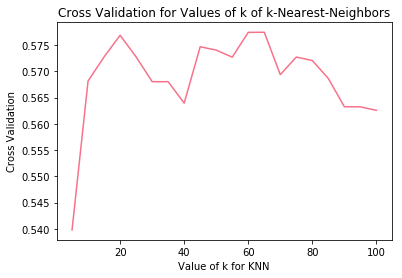

Accuracy = 0.69 for 5 neighbors with cross validaton 0.5398138994357191
Accuracy = 0.65 for 10 neighbors with cross validaton 0.5681427211983097
Accuracy = 0.64 for 15 neighbors with cross validaton 0.572717846434348
Accuracy = 0.63 for 20 neighbors with cross validaton 0.576838004721426
Accuracy = 0.62 for 25 neighbors with cross validaton 0.5727266382537564
Accuracy = 0.62 for 30 neighbors with cross validaton 0.5680148631429416
Accuracy = 0.61 for 35 neighbors with cross validaton 0.5680036423796078
Accuracy = 0.61 for 40 neighbors with cross validaton 0.5639355198098703
Accuracy = 0.61 for 45 neighbors with cross validaton 0.5746510510054084
Accuracy = 0.6 for 50 neighbors with cross validaton 0.5740141299906107
Accuracy = 0.6 for 55 neighbors with cross validaton 0.5726695124948405
Accuracy = 0.59 for 60 neighbors with cross validaton 0.577390450405162
Accuracy = 0.59 for 65 neighbors with cross validaton 0.5774130330875054
Accuracy = 0.6 for 70 neighbors with cross validaton 0.56

In [8]:
# experimenting with different n values
# This initializes knn with diferente values predicts trains the model, predicts and analizes the results 
from sklearn.model_selection import cross_val_score
start = time.time()
k_range = []  
for x in range(1,21):
  k_range.append(x*5)

scores = []
cv = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    cv_scores = cross_val_score(knn, X, y, cv=5)
    cv.append(np.mean(cv_scores))
    
MSE = [1 - x for x in scores]
end = time.time()
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, MSE)
plt.xlabel('Value of k for KNN')
plt.ylabel('Missclassification Error')
plt.title('Missclassification Error for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, cv)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross Validation')
plt.title('Cross Validation for Values of k of k-Nearest-Neighbors')
plt.show()

timeSpent = end - start
counter = 0
for score in scores:
  print('Accuracy = {} for {} neighbors with cross validaton {}'.format(round(score,2),k_range[counter],cv[counter]))
  counter = counter + 1
  
print('Time spent: {} seconds'.format(timeSpent))

In [0]:
# Calculate KNN accuracy
y_pred = knn.predict(X)
print("KNN accuracy score:" ,metrics.accuracy_score(y, y_pred))

KNN accuracy score: 0.5889487870619946


In [0]:
############ This is responsible to initialize and tain the neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
#X_normalized = normalize(X, norm='l2')
nn = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,max_iter=500, random_state=1,verbose=True)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)
nn.fit(x_train, y_train)

Iteration 1, loss = 2.30821753
Iteration 2, loss = 2.21884145
Iteration 3, loss = 2.13696553
Iteration 4, loss = 2.06025692
Iteration 5, loss = 1.99082383
Iteration 6, loss = 1.92540149
Iteration 7, loss = 1.86929312
Iteration 8, loss = 1.82172999
Iteration 9, loss = 1.78490949
Iteration 10, loss = 1.75770810
Iteration 11, loss = 1.73889148
Iteration 12, loss = 1.72525729
Iteration 13, loss = 1.71532228
Iteration 14, loss = 1.70750850
Iteration 15, loss = 1.70095232
Iteration 16, loss = 1.69428076
Iteration 17, loss = 1.68807387
Iteration 18, loss = 1.68199305
Iteration 19, loss = 1.67569400
Iteration 20, loss = 1.66875222
Iteration 21, loss = 1.66194551
Iteration 22, loss = 1.65532303
Iteration 23, loss = 1.64794594
Iteration 24, loss = 1.64093371
Iteration 25, loss = 1.63353377
Iteration 26, loss = 1.62608467
Iteration 27, loss = 1.61863708
Iteration 28, loss = 1.61135117
Iteration 29, loss = 1.60322363
Iteration 30, loss = 1.59563887
Iteration 31, loss = 1.58785339
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
######### Metric analise from the neural network train
from sklearn.metrics import accuracy_score
y_pred = nn.predict(x_test)
accuracy_score(y_test, y_pred)

0.601078167115903

In [0]:
######## This is responsible to initialize and tain the support vector machine
from sklearn.svm import SVR
y = encode.fit_transform(df['name'].astype(str))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)
svr_reg = SVR(gamma=0.001, C=1.0, epsilon=0.2,verbose=True)
log = svr_reg.fit(x_train, y_train)
print(log)
y_pred = svr_reg.predict(x_test)

[LibSVM]SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)


In [0]:
#### Returns the mean accuracy on the given test data and labels.
####### In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
svr_reg.score(x_test, y_pred)

1.0